In [3]:
import pandas as pd
import nltk
df1 = pd.read_csv('articles1.csv',usecols=['title','content'],encoding='ISO-8859-1')
df2 = pd.read_csv('articles2.csv',usecols=['title','content'],encoding='ISO-8859-1')
df3 = pd.read_csv('articles3.csv',usecols=['title','content'],encoding='ISO-8859-1')

In [4]:
 frames = [df1, df2, df3]

In [5]:
df=pd.concat(frames)

In [6]:
df.count

<bound method DataFrame.count of                                                    title  \
0      House Republicans Fret About Winning Their Hea...   
1      Rift Between Officers and Residents as Killing...   
2      Tyrus Wong, âBambiâ Artist Thwarted by Rac...   
3      Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4      Kim Jong-un Says North Korea Is Preparing to T...   
5      Sick With a Cold, Queen Elizabeth Misses New Y...   
6      Taiwanâs President Accuses China of Renewed ...   
7      After âThe Biggest Loser,â Their Bodies Fo...   
8      First, a Mixtape. Then a Romance. - The New Yo...   
9      Calling on Angels While Enduring the Trials of...   
10     Weak Federal Powers Could Limit Trumpâs Clim...   
11     Can Carbon Capture Technology Prosper Under Tr...   
12     Mar-a-Lago, the Future Winter White House and ...   
13     How to form healthy habits in your 20s - The N...   
14     Turning Your Vacation Photos Into Works of Art...   
15     

In [7]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [9]:
def text_tokenizer(text, stops):
    import re
    # 1. Eliminate markup
    text = re.sub("\<[^<>]*\>"," ", text.lower())
    # 2. Separate review strings from other types of sequences
    text = re.sub("([a-z]+|[^a-z]+)",r"\1 ", text)
    # 3. delete anything not a review, digit, $, or %
    text = re.sub("[^a-z ]","", text)
    # 4. Clean up multiple white spaces
    text = re.sub("\s+"," ", text)
    text = re.sub("^\s+","", text)
    text = re.sub("\s+$"," ", text)
    # 5. Split sentences to words
    words = text.split()
    # 6. Keep words in the `keeps`
    words = [w for w in words if w not in stops]
    # 7. Return a list of words
    return words

# Define a function to split a review into parsed sentences
def text_to_sentences(text, keeps):
    import nltk
    # Use the NLTK tokenizer to split the paragraph into sentences
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(text.strip().encode().decode('utf-8'))

    # Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(text_tokenizer(raw_sentence,keeps))
    return sentences

In [10]:
# read-in stopwords# read- 


with open('C:/Users/Fatima/AppData/Roaming/nltk_data/corpora/stopwords/english','r+') as fobj:
    stops = fobj.read().split()
fobj.closed 

True

In [11]:
# construct a collection of sentences for word-embedding learning.# const 
import time

# Initialize an empty list of sentences
sentences = [] 

print('Parsing sentences')
tic = time.clock()
for text in df['content'].astype(str):
    sentences += text_to_sentences(text,stops)
toc = time.clock()
toc - tic

Parsing sentences


3524.739635229034

In [12]:
# Word2Vec Training
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
from gensim.models import word2vec
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)


C:\Users\Fatima\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [13]:
word_vectorsword_ve  = model.wv.syn0


C:\Users\Fatima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [14]:
from sklearn.cluster import KMeans
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #bag of cenroids
    num_centroids = max( word_centroid_map.values() ) + 1
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    return bag_of_centroids

In [34]:
num_clusters =30
# Initalize a k-means object and use it to extract centroids

kmeans_clustering = KMeans(n_clusters=num_clusters)

idx = kmeans_clustering.fit_predict(word_vectorsword_ve)

word_centroid_map = dict(zip( model.wv.index2word, idx ))
for cluster in range(0,num_clusters):
     print ("\nCluster %d" % cluster)
     words = []
     for i in range(0,len(word_centroid_map.values())):
              if( list(word_centroid_map.values())[i] == cluster ):
                     words.append(list(word_centroid_map.keys())[i])
     print(words)




Cluster 0
['trump', 'one', 'new', 'president', 'time', 'clinton', 'first', 'two', 'last', 'mr', 'house', 'obama', 'campaign', 'back', 'country', 'white', 'american', 'donald', 'since', 'day', 'national', 'republican', 'political', 'week', 'another', 'party', 'election', 'washington', 'america', 'support', 'long', 'hillary', 'policy', 'presidential', 'next', 'days', 'though', 'republicans', 'bill', 'among', 'vote', 'democratic', 'saying', 'wednesday', 'voters', 'americans', 'past', 'tuesday', 'yet', 'russia', 'democrats', 'power', 'away', 'friday', 'recent', 'deal', 'members', 'general', 'months', 'month', 'senate', 'early', 'thursday', 'top', 'monday', 'china', 'clear', 'ago', 'sanders', 'candidate', 'call', 'major', 'south', 'win', 'cruz', 'issue', 'earlier', 'march', 'instead', 'speech', 'sunday', 'conservative', 'groups', 'race', 'politics', 'gop', 'behind', 'open', 'close', 'leaders', 'leader', 'lead', 'meeting', 'debate', 'nation', 'trade', 'line', 'together', 'weeks', 'saturday'

['said', 'would', 'also', 'state', 'u', 'states', 'government', 'public', 'law', 'court', 'administration', 'federal', 'security', 'whether', 'officials', 'case', 'department', 'office', 'without', 'statement', 'report', 'order', 'foreign', 'rights', 'information', 'justice', 'congress', 'executive', 'decision', 'students', 'committee', 'immigration', 'act', 'investigation', 'process', 'official', 'intelligence', 'evidence', 'reports', 'legal', 'questions', 'service', 'fbi', 'within', 'private', 'force', 'full', 'agency', 'attorney', 'judge', 'action', 'defense', 'cases', 'response', 'gun', 'current', 'special', 'rules', 'organization', 'although', 'staff', 'access', 'civil', 'involved', 'enforcement', 'list', 'ban', 'sexual', 'claims', 'board', 'criminal', 'release', 'letter', 'laws', 'concerns', 'due', 'illegal', 'immediately', 'allowed', 'employees', 'source', 'allow', 'agreement', 'decided', 'claim', 'charges', 'review', 'safety', 'additional', 'citizens', 'sources', 'refugees', 'p

['red', 'blue', 'wearing', 'gold', 'hair', 'display', 'pair', 'wear', 'glass', 'dress', 'clothes', 'bag', 'bright', 'orange', 'wore', 'dressed', 'clothing', 'plastic', 'shoes', 'metal', 'yellow', 'painting', 'wood', 'bags', 'paint', 'flowers', 'pink', 'mirror', 'thin', 'hat', 'shirt', 'tall', 'attached', 'uniform', 'photograph', 'suits', 'makeup', 'heels', 'boxes', 'painted', 'pants', 'thick', 'purple', 'ladies', 'colors', 'sporting', 'jacket', 'wings', 'wooden', 'glasses', 'diamond', 'poster', 'hip', 'rings', 'fancy', 'worn', 'colorful', 'stones', 'toilet', 'clay', 'boots', 'mask', 'fabric', 'blanket', 'designers', 'hats', 'dressing', 'wears', 'paintings', 'toy', 'toys', 'sexy', 'grey', 'carpet', 'jewelry', 'jeans', 'beard', 'outfit', 'runway', 'bits', 'layers', 'coat', 'shoe', 'lighting', 'shirts', 'costume', 'matching', 'coats', 'posters', 'logo', 'custom', 'hijab', 'leather', 'closet', 'nude', 'dresses', 'decorated', 'sheets', 'shelf', 'selfie', 'plates', 'rainbow', 'halloween', 'u

['police', 'family', 'man', 'later', 'men', 'woman', 'death', 'officers', 'officer', 'father', 'mother', 'shot', 'parents', 'child', 'authorities', 'son', 'wife', 'died', 'crime', 'shooting', 'friend', 'dead', 'prison', 'victims', 'sex', 'hospital', 'daughter', 'husband', 'incident', 'arrested', 'assault', 'scene', 'trial', 'girl', 'killing', 'girls', 'murder', 'alleged', 'reportedly', 'apparently', 'boy', 'prosecutors', 'stopped', 'brother', 'suspect', 'investigators', 'victim', 'kim', 'driver', 'suicide', 'allegedly', 'injured', 'missing', 'shortly', 'jail', 'arrest', 'guilty', 'die', 'rape', 'agent', 'guard', 'connection', 'convicted', 'sister', 'prosecutor', 'jury', 'boys', 'sheriff', 'van', 'brothers', 'footage', 'shootings', 'gang', 'witness', 'worker', 'cops', 'cell', 'witnesses', 'roof', 'lying', 'gray', 'suspects', 'patrol', 'custody', 'accident', 'sexually', 'relatives', 'sentenced', 'cosby', 'testified', 'mateen', 'stolen', 'client', 'sons', 'inmates', 'killings', 'gunman', 

['water', 'land', 'island', 'sea', 'ice', 'earth', 'coast', 'river', 'animals', 'storm', 'bodies', 'planet', 'weather', 'tiny', 'australia', 'humans', 'animal', 'wind', 'sun', 'wild', 'bear', 'winter', 'heat', 'ocean', 'snow', 'species', 'lake', 'dogs', 'fish', 'fields', 'pacific', 'surface', 'waters', 'moon', 'mine', 'sky', 'rain', 'farm', 'warm', 'mountain', 'islands', 'boat', 'alaska', 'tree', 'hurricane', 'trees', 'atmosphere', 'stretch', 'discovery', 'bears', 'landscape', 'forest', 'waves', 'wildlife', 'temperatures', 'regions', 'flood', 'flooding', 'lands', 'pollution', 'dry', 'inches', 'crossing', 'remote', 'desert', 'mosquitoes', 'soil', 'southeast', 'buried', 'winds', 'swimming', 'peninsula', 'temperature', 'mining', 'hunting', 'bird', 'northeast', 'coastal', 'mountains', 'arctic', 'birds', 'barrier', 'fishing', 'earthquake', 'shore', 'conservation', 'dust', 'km', 'farms', 'zoo', 'rocky', 'rocks', 'sand', 'zealand', 'bones', 'acres', 'drought', 'caribbean', 'mediterranean', 'd

['director', 'head', 'writing', 'professor', 'editing', 'dr', 'brown', 'manager', 'lawyer', 'author', 'smith', 'jones', 'martin', 'lee', 'williams', 'jackson', 'analyst', 'assistant', 'veteran', 'expert', 'davis', 'moore', 'jordan', 'lewis', 'cook', 'associate', 'walker', 'wilson', 'ross', 'taylor', 'harris', 'commissioner', 'anderson', 'thompson', 'scientist', 'allen', 'economist', 'cohen', 'baker', 'dean', 'marshall', 'stewart', 'principal', 'fisher', 'lane', 'bell', 'engineer', 'parker', 'researcher', 'photographer', 'turner', 'clark', 'wright', 'consultant', 'adams', 'sullivan', 'robinson', 'mitchell', 'brooks', 'lt', 'cox', 'pastor', 'hawkins', 'nelson', 'historian', 'burns', 'ward', 'sir', 'harvey', 'oliver', 'reed', 'administrator', 'specialist', 'edwards', 'mason', 'scholar', 'gordon', 'harrison', 'evans', 'friedman', 'hunter', 'watson', 'lieutenant', 'campbell', 'jenkins', 'bennett', 'knight', 'snyder', 'cole', 'hughes', 'hopkins', 'clarke', 'wang', 'architect', 'holmes', 'bra

['get', 'make', 'say', 'see', 'take', 'go', 'come', 'use', 'help', 'put', 'change', 'become', 'find', 'added', 'keep', 'give', 'move', 'run', 'control', 'follow', 'stop', 'start', 'continue', 'tell', 'leave', 'turn', 'understand', 'bring', 'hold', 'provide', 'happen', 'ask', 'remain', 'stay', 'stand', 'return', 'address', 'protect', 'meet', 'create', 'buy', 'offer', 'build', 'speak', 'adding', 'consider', 'reach', 'break', 'pass', 'cover', 'target', 'lose', 'influence', 'avoid', 'push', 'pick', 'appear', 'serve', 'respond', 'send', 'raise', 'begin', 'spend', 'learn', 'prevent', 'agree', 'carry', 'save', 'kill', 'drive', 'join', 'write', 'sell', 'seek', 'hurt', 'explain', 'ensure', 'imagine', 'spread', 'reduce', 'discuss', 'suggest', 'accept', 'block', 'add', 'decide', 'choose', 'defend', 'grow', 'replace', 'prove', 'argue', 'worry', 'secure', 'improve', 'shut', 'pull', 'gain', 'produce', 'determine', 'advance', 'represent', 'affect', 'identify', 'enter', 'attend', 'deliver', 'expand', 

['news', 'former', 'times', 'post', 'story', 'cnn', 'press', 'secretary', 'chief', 'interview', 'breitbart', 'morning', 'fox', 'senior', 'january', 'member', 'comey', 'reporting', 'comment', 'sen', 'paul', 'reporters', 'comments', 'february', 'spokesman', 'article', 'j', 'mark', 'chairman', 'vice', 'johnson', 'host', 'mike', 'adviser', 'flynn', 'mayor', 'radio', 'fellow', 'reporter', 'rep', 'scott', 'buzzfeed', 'f', 'editor', 'magazine', 'kelly', 'jeff', 'deputy', 'r', 'hill', 'npr', 'steve', 'journal', 'tweet', 'spicer', 'joe', 'newspaper', 'nbc', 'ben', 'ambassador', 'colleagues', 'atlantic', 'representative', 'jr', 'christie', 'sean', 'chair', 'miller', 'kennedy', 'reader', 'spokeswoman', 'briefing', 'ap', 'abc', 'stone', 'warren', 'carson', 'activist', 'longtime', 'guardian', 'conway', 'journalist', 'pm', 'cbs', 'carter', 'aide', 'graham', 'supporter', 'schumer', 'usa', 'yesterday', 'spokesperson', 'insider', 'boss', 'strategist', 'rice', 'politico', 'bloomberg', 'chuck', 'msnbc', 

['hit', 'front', 'hand', 'hands', 'looked', 'floor', 'feet', 'door', 'eyes', 'sitting', 'waiting', 'walk', 'pulled', 'broken', 'onto', 'eye', 'walking', 'camera', 'walked', 'suddenly', 'sat', 'heads', 'edge', 'arm', 'window', 'bed', 'barely', 'corner', 'stuck', 'shoot', 'foot', 'slowly', 'noticed', 'hitting', 'threw', 'jumped', 'jump', 'ring', 'thrown', 'pulling', 'mouth', 'locked', 'throwing', 'hole', 'smoke', 'tight', 'soft', 'desk', 'picking', 'sight', 'burning', 'clock', 'neck', 'legs', 'flat', 'dropping', 'hanging', 'waited', 'kick', 'shoulder', 'burned', 'burst', 'grab', 'horse', 'trapped', 'belt', 'beneath', 'rolled', 'wound', 'screaming', 'lock', 'sleeping', 'loose', 'burn', 'hang', 'chest', 'grabbed', 'pack', 'noise', 'barrel', 'tear', 'finger', 'iron', 'drag', 'teeth', 'patch', 'pocket', 'riding', 'bullet', 'walks', 'dragged', 'knocked', 'backs', 'breath', 'bullets', 'hung', 'plate', 'naked', 'wrapped', 'filling', 'nose', 'ceiling', 'trash', 'punch', 'ears', 'blew', 'fingers'

['food', 'hot', 'eat', 'eating', 'coffee', 'drink', 'foods', 'sugar', 'meat', 'kitchen', 'sweet', 'wine', 'taste', 'fat', 'chicken', 'beer', 'salt', 'breakfast', 'milk', 'cooking', 'fruit', 'meal', 'eggs', 'meals', 'drinks', 'grocery', 'cheese', 'pot', 'cream', 'bottle', 'bread', 'thanksgiving', 'frozen', 'chocolate', 'beef', 'recipe', 'organic', 'cake', 'pizza', 'egg', 'ingredients', 'smell', 'menu', 'vegetables', 'bottles', 'corn', 'calories', 'soda', 'candy', 'ate', 'seeds', 'dish', 'pet', 'chips', 'pepper', 'dairy', 'burger', 'juice', 'butter', 'dishes', 'sauce', 'cigarettes', 'topped', 'slice', 'pan', 'nuts', 'salad', 'flavor', 'pie', 'beans', 'pig', 'fruits', 'recipes', 'cocktail', 'sandwich', 'pork', 'shelves', 'cups', 'soup', 'cookies', 'fried', 'honey', 'soap', 'delicious', 'cooked', 'mixture', 'tastes', 'grain', 'powder', 'eaten', 'weed', 'potatoes', 'harvest', 'lemon', 'junk', 'cow', 'chefs', 'staple', 'bacon', 'culinary', 'grilled', 'olive', 'potato', 'tomatoes', 'grill', '

['john', 'david', 'ms', 'michael', 'james', 'chris', 'robert', 'tom', 'richard', 'thomas', 'peter', 'married', 'andrew', 'writer', 'stephen', 'eric', 'jim', 'bob', 'william', 'charles', 'tim', 'anthony', 'daniel', 'matt', 'jack', 'jason', 'kevin', 'sarah', 'brian', 'mary', 'elizabeth', 'frank', 'michelle', 'dan', 'adam', 'jonathan', 'alex', 'matthew', 'joseph', 'josh', 'susan', 'patrick', 'charlie', 'gary', 'howard', 'nick', 'tony', 'steven', 'jennifer', 'jon', 'jimmy', 'alexander', 'henry', 'justin', 'aaron', 'nancy', 'sam', 'greg', 'ed', 'lisa', 'neil', 'christopher', 'ron', 'larry', 'jay', 'recalls', 'pat', 'rob', 'jane', 'russell', 'ann', 'jeffrey', 'angela', 'bruce', 'simon', 'keith', 'benjamin', 'jerry', 'edward', 'amy', 'dave', 'joel', 'rachel', 'phil', 'terry', 'ian', 'alan', 'max', 'douglas', 'philip', 'ken', 'andy', 'courtesy', 'jeremy', 'barbara', 'carl', 'marc', 'ray', 'kate', 'barry', 'anne', 'laura', 'lawrence', 'chef', 'emily', 'roy', 'jessica', 'pam', 'walter', 'leslie'

['years', 'year', 'percent', 'million', 'three', 'health', 'big', 'less', 'least', 'money', 'likely', 'already', 'care', 'number', 'four', 'high', 'working', 'plan', 'billion', 'job', 'tax', 'five', 'countries', 'almost', 'program', 'economic', 'nearly', 'small', 'free', 'pay', 'market', 'jobs', 'research', 'global', 'large', 'expected', 'six', 'financial', 'workers', 'plans', 'half', 'economy', 'share', 'bank', 'services', 'education', 'mexico', 'families', 'energy', 'thousands', 'cut', 'biggest', 'cost', 'rate', 'schools', 'single', 'price', 'oil', 'spending', 'higher', 'growth', 'millions', 'capital', 'insurance', 'seven', 'short', 'per', 'coverage', 'areas', 'increase', 'paid', 'budget', 'eight', 'significant', 'numbers', 'average', 'cities', 'total', 'worth', 'huge', 'low', 'poor', 'currently', 'largest', 'population', 'lower', 'available', 'alone', 'period', 'labor', 'programs', 'funding', 'costs', 'rates', 'sales', 'leaving', 'development', 'mostly', 'moving', 'prices', 'dollars

['n', 'de', 'mexican', 'la', 'l', 'g', 'le', 'brazil', 'rio', 'el', 'italian', 'spanish', 'en', 'brazilian', 'spain', 'des', 'jose', 'antonio', 'colombia', 'lopez', 'maria', 'del', 'est', 'carlos', 'caracas', 'enrique', 'rodriguez', 'les', 'juan', 'argentina', 'gabriel', 'pena', 'garcia', 'da', 'rivera', 'grande', 'victor', 'martinez', 'venezuelan', 'il', 'se', 'luis', 'janeiro', 'manuel', 'du', 'li', 'sa', 'que', 'salvador', 'costa', 'silva', 'paulo', 'fran', 'michel', 'emmanuel', 'santos', 'mario', 'madrid', 'leon', 'colombian', 'rodrigo', 'elle', 'di', 'gonzalez', 'chile', 'ois', 'der', 'ana', 'ortiz', 'portugal', 'ramos', 'flores', 'ne', 'amsterdam', 'peru', 'jos', 'rosa', 'dominican', 'francois', 'pas', 'rafael', 'sao', 'nicolas', 'chavez', 'hugo', 'une', 'jorge', 'rican', 'honduras', 'fernandez', 'gypsy', 'sur', 'ecuador', 'guatemala', 'au', 'qui', 'qu', 'diaz', 'sergio', 'raul', 'mi', 'pablo', 'villa', 'milan', 'jamaica', 'ra', 'ch', 'felix', 'iv', 'lula', 'morales', 'gomez', 'p

['company', 'business', 'companies', 'recently', 'industry', 'project', 'network', 'chinese', 'foundation', 'firm', 'apple', 'investment', 'e', 'ceo', 'investors', 'management', 'stock', 'customers', 'products', 'partners', 'shares', 'k', 'tech', 'uber', 'sold', 'corporate', 'estate', 'product', 'partner', 'brand', 'inc', 'amazon', 'selling', 'owner', 'founder', 'unit', 'giant', 'bought', 'executives', 'contract', 'commercial', 'owners', 'trading', 'division', 'sale', 'tesla', 'firms', 'kushner', 'ford', 'stake', 'owned', 'canadian', 'partnership', 'advertising', 'clients', 'co', 'parent', 'entertainment', 'chain', 'airlines', 'goldman', 'marketing', 'yahoo', 'silicon', 'producers', 'equity', 'retail', 'commerce', 'wells', 'nonprofit', 'owns', 'investor', 'warner', 'kong', 'customer', 'hong', 'corp', 'associates', 'empire', 'managing', 'properties', 'disney', 'morgan', 'banking', 'managers', 'microsoft', 'carrier', 'hedge', 'maker', 'snap', 'samsung', 'scheme', 'musk', 'sachs', 'brands

['people', 'could', 'even', 'says', 'many', 'us', 'think', 'going', 'may', 'way', 'much', 'still', 'women', 'work', 'want', 'well', 'right', 'part', 'good', 'really', 'might', 'need', 'every', 'something', 'things', 'lot', 'far', 'great', 'look', 'place', 'better', 'point', 'best', 'different', 'system', 'today', 'thing', 'often', 'always', 'fact', 'real', 'believe', 'social', 'others', 'enough', 'trying', 'person', 'kind', 'important', 'however', 'question', 'ever', 'actually', 'hard', 'feel', 'community', 'done', 'able', 'matter', 'must', 'human', 'course', 'future', 'issues', 'problem', 'nothing', 'possible', 'anything', 'idea', 'rather', 'means', 'role', 'sure', 'looking', 'example', 'everything', 'especially', 'seems', 'probably', 'reason', 'try', 'sense', 'interest', 'wants', 'either', 'true', 'hope', 'personal', 'mean', 'potential', 'anyone', 'experience', 'perhaps', 'view', 'simply', 'whole', 'policies', 'needs', 'else', 'ways', 'level', 'risk', 'problems', 'longer', 'sometimes

['art', 'character', 'sound', 'feels', 'dark', 'interesting', 'perfect', 'moments', 'turns', 'characters', 'beautiful', 'style', 'emotional', 'sounds', 'inspired', 'memory', 'strange', 'theme', 'mix', 'beauty', 'creative', 'remarkable', 'incredible', 'perfectly', 'horror', 'weird', 'joy', 'dreams', 'magic', 'odd', 'occasionally', 'fiction', 'impressive', 'brilliant', 'memories', 'contemporary', 'exciting', 'tale', 'mystery', 'surprisingly', 'raw', 'pure', 'passion', 'fantasy', 'humor', 'visual', 'curious', 'romantic', 'self', 'themes', 'loving', 'inspiration', 'fascinating', 'portrait', 'references', 'genius', 'genre', 'passionate', 'twist', 'occasional', 'emotion', 'subtle', 'mysterious', 'sheer', 'pleasure', 'imagination', 'casual', 'intimate', 'literary', 'terrifying', 'memorable', 'darkness', 'captures', 'nod', 'glimpse', 'spectacular', 'spectacle', 'hint', 'obsession', 'authentic', 'inspiring', 'poetry', 'persona', 'artistic', 'lovely', 'clever', 'sequence', 'humble', 'imagery', '

['making', 'given', 'comes', 'makes', 'whose', 'based', 'shows', 'similar', 'common', 'takes', 'goes', 'created', 'changed', 'works', 'related', 'giving', 'main', 'appears', 'powerful', 'critical', 'concerned', 'believes', 'traditional', 'familiar', 'focused', 'natural', 'modern', 'writes', 'putting', 'present', 'limited', 'suggests', 'becoming', 'designed', 'gives', 'keeping', 'shown', 'creating', 'interested', 'becomes', 'turning', 'changing', 'active', 'developed', 'greatest', 'rare', 'unlike', 'offers', 'stands', 'providing', 'allows', 'explains', 'setting', 'broader', 'sees', 'represents', 'fit', 'leads', 'uses', 'adds', 'complicated', 'established', 'unique', 'leaves', 'crucial', 'provides', 'grown', 'opposite', 'exist', 'puts', 'holds', 'developing', 'driven', 'dealing', 'finds', 'protecting', 'connected', 'reflect', 'consistent', 'proved', 'supports', 'serves', 'keeps', 'brings', 'exposed', 'understood', 'typical', 'challenging', 'argues', 'describes', 'controlled', 'extraordin

['air', 'car', 'fire', 'technology', 'ground', 'space', 'weapons', 'light', 'parts', 'operations', 'cars', 'japan', 'gas', 'missile', 'flight', 'systems', 'operation', 'driving', 'plane', 'launch', 'train', 'vehicle', 'fast', 'vehicles', 'traffic', 'heavy', 'bomb', 'carrying', 'navy', 'design', 'operating', 'chemical', 'devices', 'aircraft', 'plant', 'machine', 'device', 'truck', 'crew', 'targets', 'fuel', 'equipment', 'weapon', 'passengers', 'crash', 'facility', 'pounds', 'speed', 'zone', 'ship', 'models', 'solar', 'advanced', 'industrial', 'transportation', 'fly', 'flying', 'route', 'plants', 'nasa', 'electric', 'missiles', 'cameras', 'bombs', 'steel', 'ballistic', 'flights', 'units', 'materials', 'pilot', 'concrete', 'trained', 'technologies', 'passenger', 'drone', 'explosion', 'engineering', 'delivery', 'planes', 'phase', 'machines', 'cloud', 'electricity', 'airports', 'rocket', 'blast', 'landing', 'supplies', 'jet', 'ships', 'mars', 'engineers', 'explosive', 'underground', 'trucks

['show', 'book', 'series', 'film', 'tv', 'star', 'music', 'movie', 'television', 'fans', 'performance', 'song', 'hollywood', 'episode', 'rock', 'famous', 'favorite', 'actor', 'fashion', 'album', 'band', 'stars', 'plays', 'prince', 'movies', 'pop', 'comedy', 'artist', 'films', 'songs', 'viewers', 'drama', 'award', 'awards', 'artists', 'actors', 'novel', 'producer', 'singer', 'celebrity', 'golden', 'writers', 'classic', 'actress', 'theater', 'documentary', 'hero', 'studio', 'scenes', 'musical', 'harry', 'hamilton', 'dance', 'master', 'netflix', 'wedding', 'oscar', 'concert', 'guest', 'fame', 'featuring', 'episodes', 'queen', 'celebrities', 'audiences', 'debut', 'performing', 'broadway', 'grace', 'singing', 'famously', 'comic', 'hbo', 'edition', 'beloved', 'comedian', 'designer', 'iconic', 'beyonc', 'stranger', 'script', 'dylan', 'performances', 'sing', 'legend', 'dancing', 'crown', 'tribute', 'simpson', 'reynolds', 'fantastic', 'lyrics', 'baldwin', 'jazz', 'tune', 'solo', 'starring', 'ma

['children', 'study', 'drug', 'medical', 'body', 'age', 'heart', 'treatment', 'drugs', 'researchers', 'scientists', 'patients', 'studies', 'disease', 'blood', 'doctors', 'cancer', 'baby', 'zika', 'birth', 'brain', 'condition', 'pain', 'physical', 'deaths', 'mental', 'effects', 'doctor', 'virus', 'healthy', 'weight', 'adults', 'tests', 'sleep', 'injuries', 'testing', 'pregnant', 'medicine', 'patient', 'sick', 'causes', 'severe', 'skin', 'adult', 'surgery', 'drinking', 'alcohol', 'babies', 'stress', 'cells', 'tested', 'mothers', 'depression', 'addiction', 'pregnancy', 'illness', 'lab', 'ill', 'dna', 'dying', 'symptoms', 'prevention', 'diseases', 'substance', 'ages', 'diet', 'clinic', 'therapy', 'exposure', 'infected', 'heroin', 'cdc', 'outbreak', 'disorder', 'diagnosed', 'opioid', 'infection', 'genetic', 'trials', 'trauma', 'vaccine', 'mosquito', 'smoking', 'prescription', 'clinical', 'gene', 'biological', 'immune', 'autism', 'samples', 'hiv', 'chronic', 'bacteria', 'periods', 'medicatio

['team', 'second', 'game', 'play', 'season', 'final', 'third', 'minutes', 'field', 'games', 'playing', 'players', 'league', 'sports', 'fourth', 'player', 'football', 'title', 'round', 'beat', 'straight', 'ball', 'teams', 'coach', 'match', 'spot', 'winner', 'nfl', 'olympic', 'fifth', 'baseball', 'finished', 'missed', 'bowl', 'shots', 'olympics', 'sport', 'champion', 'finish', 'score', 'injury', 'minute', 'seconds', 'cup', 'murray', 'hits', 'basketball', 'silver', 'giants', 'jets', 'offense', 'stadium', 'pitch', 'row', 'chelsea', 'yankees', 'mets', 'soccer', 'nba', 'brady', 'seasons', 'beating', 'yards', 'tournament', 'captain', 'patriots', 'quarterback', 'defensive', 'medal', 'arena', 'pro', 'leg', 'sixth', 'warriors', 'championship', 'manning', 'franchise', 'woods', 'scored', 'chase', 'anthem', 'passes', 'bench', 'luck', 'rounds', 'tennis', 'knicks', 'squad', 'kaepernick', 'locker', 'ninth', 'consecutive', 'curry', 'seventh', 'arsenal', 'athlete', 'marathon', 'matches', 'titles', 'prem

['left', 'end', 'face', 'coming', 'violence', 'latest', 'result', 'crisis', 'fall', 'growing', 'fear', 'rise', 'throughout', 'loss', 'worse', 'deep', 'mass', 'beginning', 'increasingly', 'seeing', 'worst', 'conflict', 'continues', 'caused', 'facing', 'failure', 'losing', 'damage', 'happening', 'era', 'worried', 'faces', 'amid', 'rising', 'scandal', 'cold', 'wake', 'corruption', 'anger', 'slow', 'danger', 'struggling', 'struggle', 'fresh', 'apart', 'wave', 'unprecedented', 'vulnerable', 'experienced', 'wars', 'fears', 'cycle', 'disaster', 'ending', 'ends', 'falling', 'suffering', 'weak', 'apparent', 'widespread', 'deadly', 'dramatic', 'surrounding', 'chaos', 'tensions', 'intense', 'sharp', 'enormous', 'struggled', 'shock', 'causing', 'seemingly', 'fate', 'uncertainty', 'partly', 'surge', 'collapse', 'anxiety', 'destruction', 'constant', 'tragedy', 'deeper', 'recession', 'aftermath', 'brutal', 'suffer', 'desperate', 'rush', 'rapidly', 'devastating', 'frustration', 'sudden', 'overwhelming

['like', 'know', 'never', 'got', 'little', 'night', 'let', 'read', 'thought', 'getting', 'someone', 'wanted', 'love', 'talk', 'old', 'everyone', 'friends', 'words', 'happened', 'moment', 'talking', 'felt', 'maybe', 'heard', 'kids', 'knew', 'watch', 'bit', 'pretty', 'yes', 'gets', 'hear', 'word', 'guy', 'crowd', 'looks', 'remember', 'telling', 'knows', 'audience', 'pic', 'happy', 'voice', 'tells', 'please', 'watching', 'feeling', 'everybody', 'stuff', 'fine', 'https', 'guys', 'wait', 'nobody', 'nice', 'listen', 'oh', 'fun', 'somebody', 'dinner', 'loved', 'angry', 'trouble', 'lady', 'thank', 'basically', 'wonder', 'sit', 'dog', 'except', 'gotten', 'folks', 'miss', 'terrible', 'proud', 'mom', 'quick', 'tonight', 'dream', 'surprised', 'wish', 'recalled', 'realize', 'literally', 'touch', 'crazy', 'anybody', 'fan', 'starts', 'afraid', 'dad', 'replied', 'ok', 'guess', 'alive', 'hell', 'amazing', 'forget', 'knowing', 'asks', 'kid', 'realized', 'likes', 'anymore', 'upset', 'sad', 'anyway', 'qui

['united', 'group', 'war', 'north', 'attack', 'military', 'russian', 'international', 'killed', 'syria', 'attacks', 'islamic', 'minister', 'isis', 'forces', 'iran', 'europe', 'muslim', 'iraq', 'east', 'syrian', 'british', 'israel', 'fighting', 'nations', 'terrorist', 'reuters', 'french', 'turkey', 'terrorism', 'region', 'army', 'france', 'visit', 'germany', 'peace', 'believed', 'western', 'paris', 'saudi', 'german', 'eastern', 'armed', 'terror', 'strike', 'korean', 'regime', 'troops', 'al', 'camp', 'afghanistan', 'northern', 'turkish', 'refugee', 'iraqi', 'assad', 'migrants', 'moscow', 'terrorists', 'un', 'arabia', 'cia', 'soldiers', 'civilians', 'fighters', 'india', 'israeli', 'arms', 'africa', 'aleppo', 'ministry', 'mosul', 'militants', 'diplomatic', 'territory', 'marine', 'japanese', 'brussels', 'iranian', 'wounded', 'suspected', 'arab', 'pentagon', 'regional', 'strikes', 'asia', 'ukraine', 'gulf', 'ali', 'italy', 'abroad', 'erdogan', 'libya', 'indian', 'rebels', 'bombing', 'kurdish

['twitter', 'video', 'facebook', 'name', 'data', 'using', 'email', 'online', 'stories', 'phone', 'daily', 'internet', 'account', 'site', 'emails', 'com', 'website', 'note', 'google', 'version', 'piece', 'page', 'secret', 'paper', 'original', 'track', 'users', 'photo', 'images', 'picture', 'via', 'search', 'check', 'notes', 'reading', 'ads', 'books', 'accounts', 'image', 'names', 'fake', 'photos', 'ad', 'content', 'material', 'computer', 'regular', 'card', 'messages', 'digital', 'videos', 'app', 'software', 'update', 'tweets', 'sites', 'interviews', 'channel', 'box', 'features', 'feature', 'updates', 'readers', 'text', 'collection', 'mobile', 'screen', 'pictures', 'networks', 'outlets', 'wikileaks', 'iphone', 'map', 'regularly', 'hacking', 'link', 'sharing', 'cable', 'pieces', 'select', 'pages', 'tools', 'user', 'papers', 'detailed', 'instagram', 'youtube', 'items', 'web', 'tool', 'posts', 'updated', 'archive', 'phones', 'blog', 'profile', 'feed', 'tape', 'links', 'letters', 'guide', 'c

['york', 'school', 'university', 'center', 'college', 'texas', 'california', 'th', 'c', 'june', 'county', 'florida', 'july', 'p', 'district', 'april', 'george', 'student', 'san', 'december', 'september', 'october', 'chicago', 'st', 'los', 'virginia', 'august', 'ohio', 'southern', 'angeles', 'institute', 'jersey', 'afternoon', 'grew', 'hall', 'pennsylvania', 'michigan', 'campus', 'francisco', 'v', 'runs', 'arizona', 'georgia', 'indiana', 'cleveland', 'dallas', 'retired', 'valley', 'boston', 'orlando', 'native', 'h', 'england', 'philadelphia', 'jan', 'colorado', 'brooklyn', 'teacher', 'rural', 'bay', 'academy', 'miami', 'alabama', 'harvard', 'originally', 'minnesota', 'illinois', 'massachusetts', 'louisiana', 'kansas', 'dc', 'houston', 'maryland', 'detroit', 'atlanta', 'oklahoma', 'nov', 'baltimore', 'dakota', 'columbia', 'resident', 'utah', 'oregon', 'missouri', 'louis', 'kentucky', 'feb', 'sept', 'manchester', 'seattle', 'charlotte', 'maine', 'tennessee', 'graduate', 'arkansas', 'vegas

['city', 'around', 'home', 'across', 'local', 'live', 'along', 'outside', 'street', 'hours', 'area', 'west', 'room', 'building', 'near', 'living', 'inside', 'town', 'london', 'park', 'couple', 'hundreds', 'summer', 'residents', 'green', 'miles', 'places', 'built', 'road', 'club', 'hotel', 'evening', 'trip', 'station', 'closed', 'hour', 'airport', 'store', 'lived', 'homes', 'streets', 'dozens', 'beach', 'square', 'restaurant', 'neighborhood', 'bar', 'construction', 'grand', 'manhattan', 'nearby', 'spring', 'apartment', 'dozen', 'tower', 'tour', 'museum', 'buildings', 'cross', 'stores', 'bus', 'christmas', 'holiday', 'golf', 'village', 'pool', 'neighbors', 'bridge', 'location', 'houses', 'headquarters', 'shop', 'ceremony', 'ride', 'offices', 'avenue', 'traveling', 'doors', 'festival', 'memorial', 'restaurants', 'located', 'visiting', 'visitors', 'empty', 'staying', 'downtown', 'neighborhoods', 'factory', 'guests', 'hundred', 'walls', 'gathering', 'luxury', 'rooms', 'bars', 'shopping', 'b

['media', 'bad', 'wrong', 'dangerous', 'truth', 'critics', 'hate', 'violent', 'false', 'journalists', 'racist', 'rhetoric', 'blame', 'racism', 'reaction', 'suggesting', 'offensive', 'extreme', 'mistake', 'lies', 'frequently', 'totally', 'conspiracy', 'somehow', 'lie', 'accusations', 'enemy', 'merely', 'attacking', 'reference', 'threatening', 'silence', 'innocent', 'enemies', 'outrage', 'hostile', 'disagree', 'propaganda', 'motivated', 'unfair', 'leaks', 'perceived', 'corrupt', 'shame', 'rigged', 'ridiculous', 'blind', 'shocking', 'stupid', 'mere', 'frankly', 'contrary', 'theories', 'fault', 'hatred', 'apologize', 'disturbing', 'excuse', 'harsh', 'outright', 'suggestion', 'toxic', 'inappropriate', 'ugly', 'lied', 'supposedly', 'bizarre', 'unacceptable', 'misleading', 'criticizing', 'divisive', 'suspicion', 'deliberately', 'absurd', 'nasty', 'plain', 'embarrassing', 'sexist', 'denial', 'bigotry', 'insisting', 'correctness', 'collusion', 'criticize', 'tactic', 'authoritarian', 'ignoring',

['world', 'life', 'black', 'history', 'young', 'lives', 'freedom', 'culture', 'religious', 'society', 'church', 'muslims', 'born', 'king', 'god', 'gay', 'century', 'democracy', 'marriage', 'christian', 'african', 'faith', 'islam', 'cultural', 'religion', 'jewish', 'english', 'honor', 'revolution', 'flag', 'ii', 'immigrant', 'republic', 'liberty', 'pope', 'catholic', 'christians', 'youth', 'tradition', 'jews', 'spirit', 'followers', 'evil', 'francis', 'journey', 'heritage', 'taught', 'childhood', 'equality', 'celebrate', 'peaceful', 'pride', 'generations', 'ancient', 'ethnic', 'latin', 'humanity', 'roots', 'founding', 'jesus', 'blacks', 'expression', 'soul', 'communist', 'feminist', 'chapter', 'hitler', 'slavery', 'sisters', 'symbol', 'celebration', 'revolutionary', 'forgotten', 'nazi', 'prayer', 'tribe', 'grave', 'holy', 'courage', 'extremism', 'lord', 'holocaust', 'hearts', 'dignity', 'oldest', 'bible', 'nationalism', 'origin', 'friendship', 'churches', 'solidarity', 'literature', 'ce

['told', 'made', 'according', 'including', 'called', 'found', 'asked', 'used', 'took', 'came', 'reported', 'several', 'wrote', 'set', 'went', 'seen', 'known', 'taking', 'taken', 'began', 'released', 'lost', 'started', 'became', 'led', 'saw', 'announced', 'held', 'following', 'worked', 'gave', 'turned', 'received', 'tried', 'sent', 'spent', 'showed', 'continued', 'described', 'met', 'calls', 'helped', 'brought', 'calling', 'published', 'include', 'leading', 'appeared', 'spoke', 'played', 'speaking', 'noted', 'accused', 'included', 'moved', 'raised', 'gone', 'claimed', 'named', 'passed', 'suggested', 'considered', 'served', 'offered', 'posted', 'confirmed', 'ended', 'forced', 'signed', 'written', 'charged', 'argued', 'followed', 'fell', 'issued', 'kept', 'reached', 'compared', 'provided', 'explained', 'filed', 'fired', 'learned', 'ran', 'includes', 'shared', 'showing', 'denied', 'responded', 'holding', 'rose', 'tweeted', 'warned', 'identified', 'opened', 'joined', 'opening', 'declared', 

In [38]:
# Example to get all documents in cluster 0
import numpy as np
cluster_4 = np.where(idx==4)
print(cluster_4)
for i in cluster_4:
 #print(df['content'])
 #print(df.iloc[i]['content'])
 print(df.iloc[i])
 df_cluster_4=df.iloc[i]
 df_cluster_4.to_csv('C:/Users/Fatima/Desktop/RBC/update_classification/first level sub clustering/K=30/cluster4.csv')



(array([  410,   850,  1109, ..., 42848, 42881, 42967], dtype=int64),)
                                                   title  \
410    Physician Aid in Dying Gains Acceptance in the...   
850    How to Have a Relaxing Vacation in a City - Th...   
1109   3 Playwrights on How Mass Shootings Forced The...   
1230   Bill Maher and Milo Yiannopoulos Find Common G...   
1358   Friday Mailbag: Faulty Headlines, Insensitive ...   
1423          Runway vs. Red Carpet - The New York Times   
1708   No Health Insurance Is Hard. No Phone? Unthink...   
1945   Resurgent Syrian Rebels Surprise Damascus With...   
2026   Congress Moves to Strike Internet Privacy Rule...   
2053   In Washingtonâs Daily Trump Wars, Devin Nune...   
2097   Thieves Take a Chunk of Change, All 221 Pounds...   
2175   After Calling Nafta âWorst Trade Deal,â Tr...   
2211   On âBrexit,â Itâs Divorce First, Trade T...   
2250   A Hushed Departure at the Met Museum Reveals E...   
2321   Trump, Syria, Pepsi: Y

In [32]:
# Example to get all documents in cluster 0
import numpy as np
cluster_9 = np.where(idx==9)
#print(cluster_0)
for i in cluster_9:
 #print(df['content'])
 #print(df.iloc[i]['content'])
 print(df.iloc[i])
 df_cluster_9=df.iloc[i]
 df_cluster_9.to_csv('C:/Users/Fatima/Desktop/RBC/update_classification/cluster9.csv')


Empty DataFrame
Columns: [title, content]
Index: []


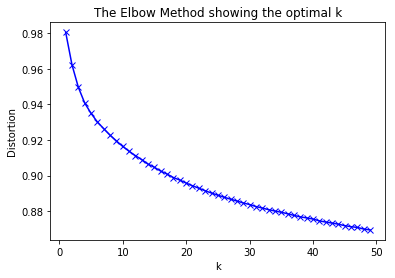

In [113]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(word_vectorsword_ve)
    kmeanModel.fit(word_vectorsword_ve)
    distortions.append(sum(np.min(cdist(word_vectorsword_ve, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / word_vectorsword_ve.shape[0])

# Plot the elbow
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()




In [118]:
distortions

[0.9806983200056599,
 0.9623092622790418,
 0.9496865775232514,
 0.9408478191907532,
 0.9350257366183645,
 0.9301735454944509,
 0.9263741252330399,
 0.9227140682944883,
 0.9194904052024979,
 0.9163853199954655,
 0.9136711958136066,
 0.9111752999943571,
 0.9089331399061085,
 0.9063912877482253,
 0.9045967535022525,
 0.9024636604809485,
 0.900786923062007,
 0.8988421983826238,
 0.8974364560157606,
 0.8957499204745233,
 0.8942272266184232,
 0.8928425147854464,
 0.891417391595866,
 0.8901179089134618,
 0.8889061237864634,
 0.8877568553851904,
 0.8866761649689294,
 0.8856359154304257,
 0.8845438332755111,
 0.8836515633640634,
 0.8825320517428996,
 0.8816859788192623,
 0.8807621722155392,
 0.8799818898119769,
 0.8793106771243125,
 0.8784469743540858,
 0.8775446167477445,
 0.8767205266973906,
 0.8761196549386759,
 0.8754814995791421,
 0.8744628056812447,
 0.8737825530942419,
 0.8732257434408417,
 0.8725917086720644,
 0.8717552727092353,
 0.8711757651525847,
 0.8707605882930667,
 0.869851500870